<a href="https://colab.research.google.com/github/Tweenwrld/Iris-data-analysis/blob/main/Iris_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 1: Load and Explore the Dataset
--------------------------------------------------
Dataset loaded successfully!

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Dataset information:
Shape: (150, 5)

Data types:
sepal length (cm)     float64
sepal width (cm)      float64
petal length (cm)     float64
petal width (cm)      float64
species              category
dtype: object

Missing values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal

<ipython-input-1-4f290bfb1e25>:60: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  iris_df_with_na[column].fillna(mean_value, inplace=True)
<ipython-input-1-4f290bfb1e25>:65: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

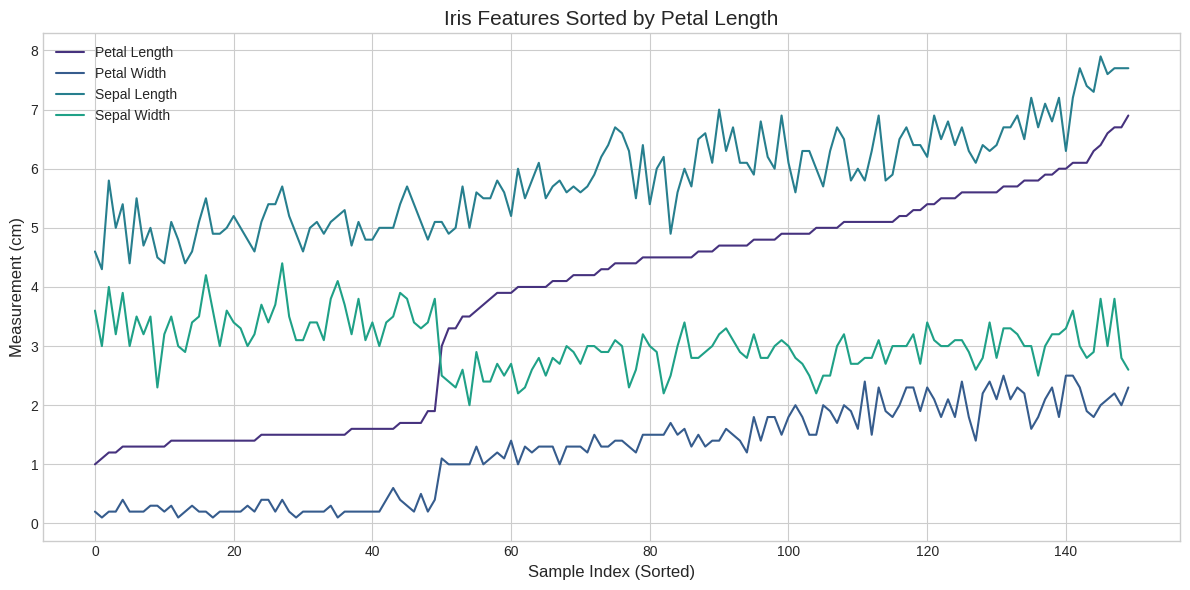

Line chart created successfully!


<Figure size 1200x600 with 0 Axes>

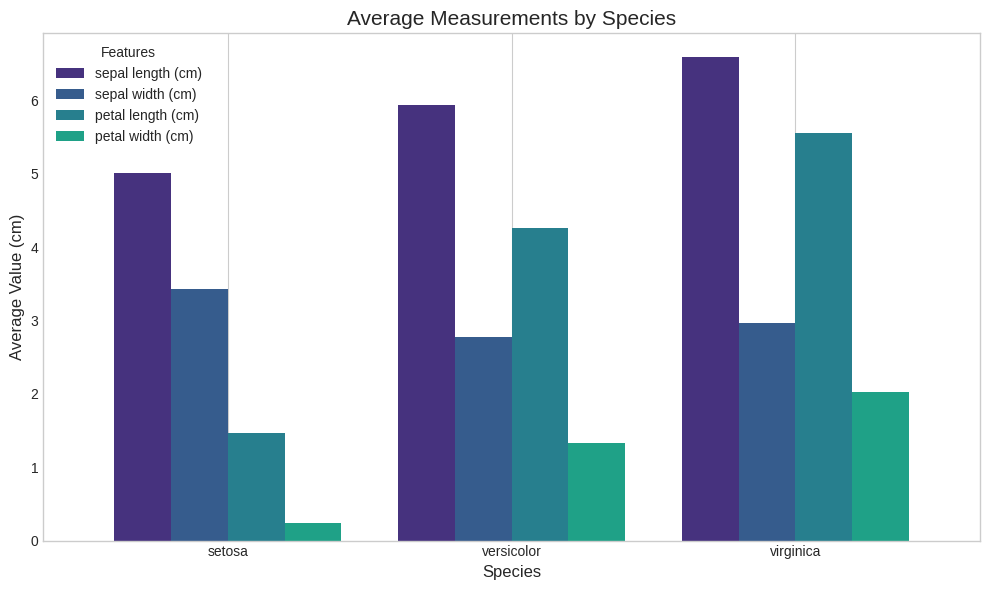

Bar chart created successfully!


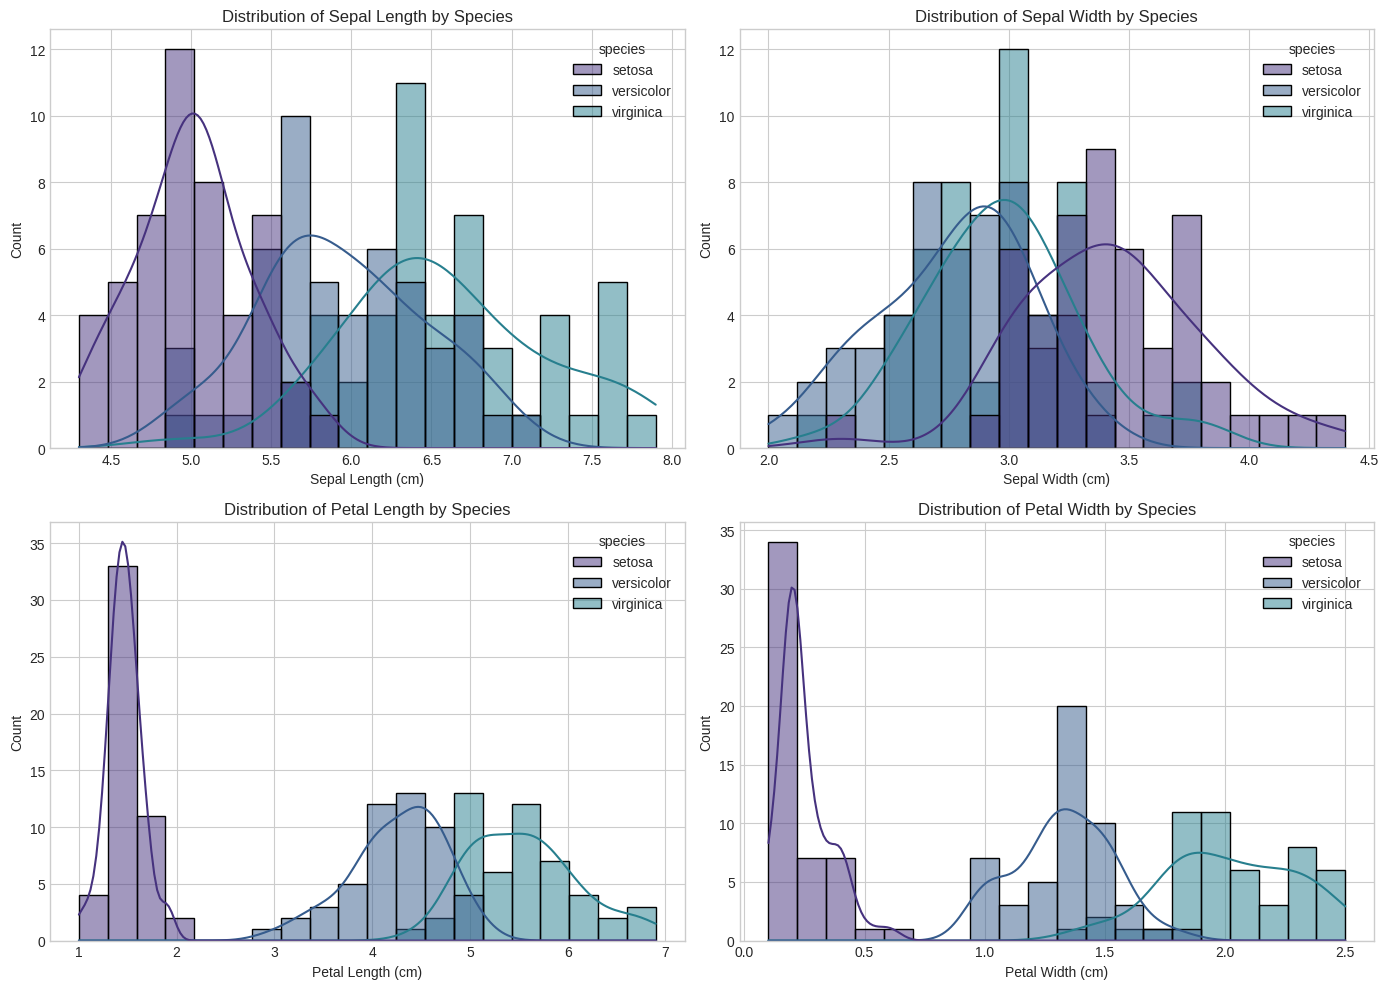

Histograms created successfully!


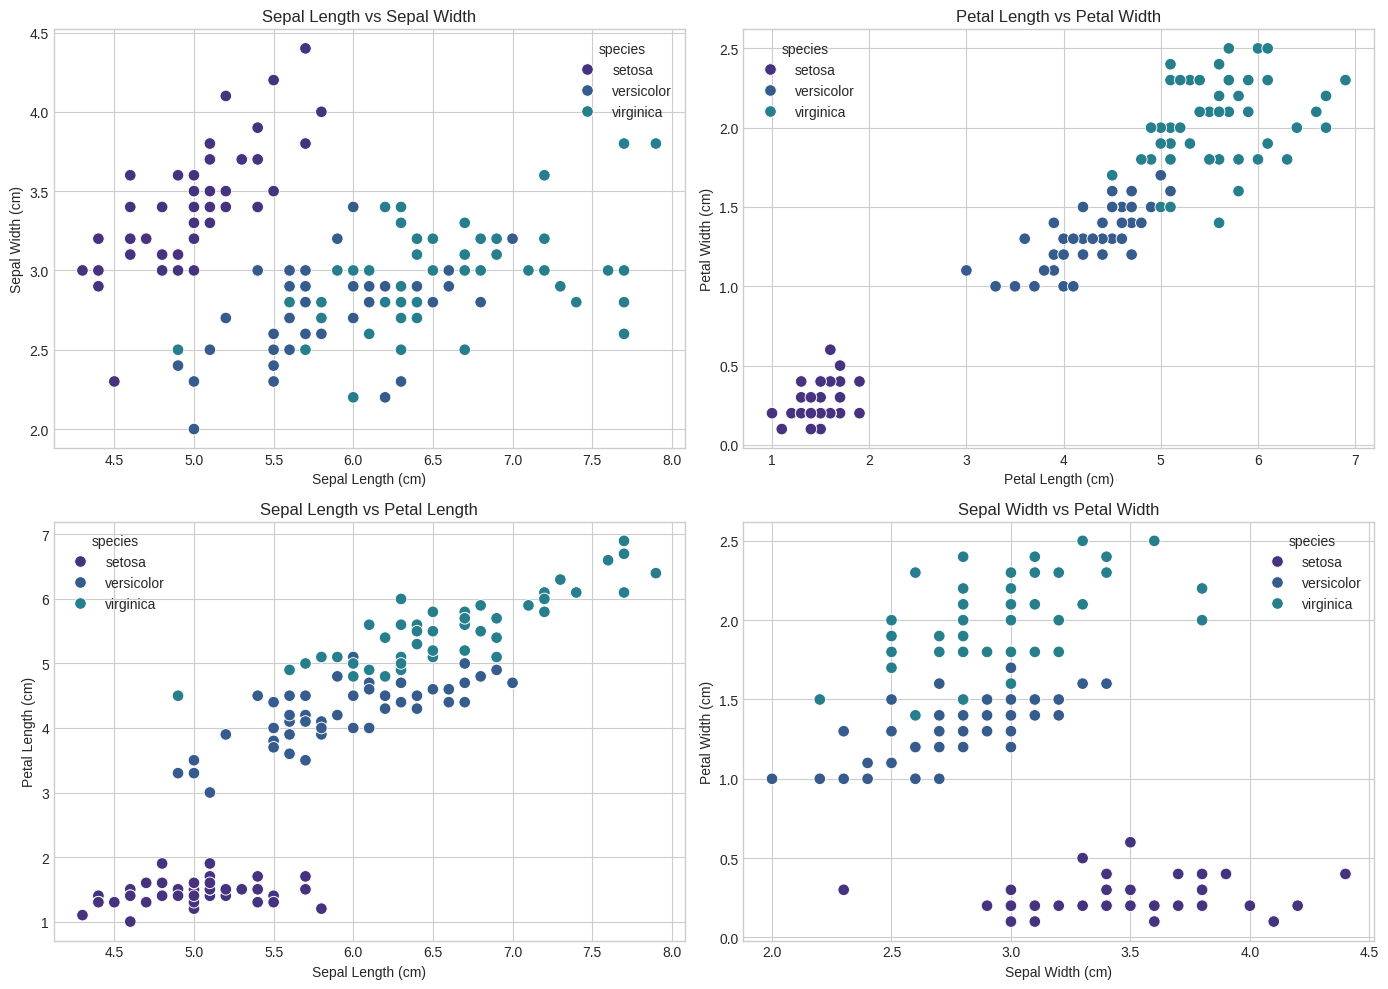

Scatter plots created successfully!


<Figure size 1200x1000 with 0 Axes>

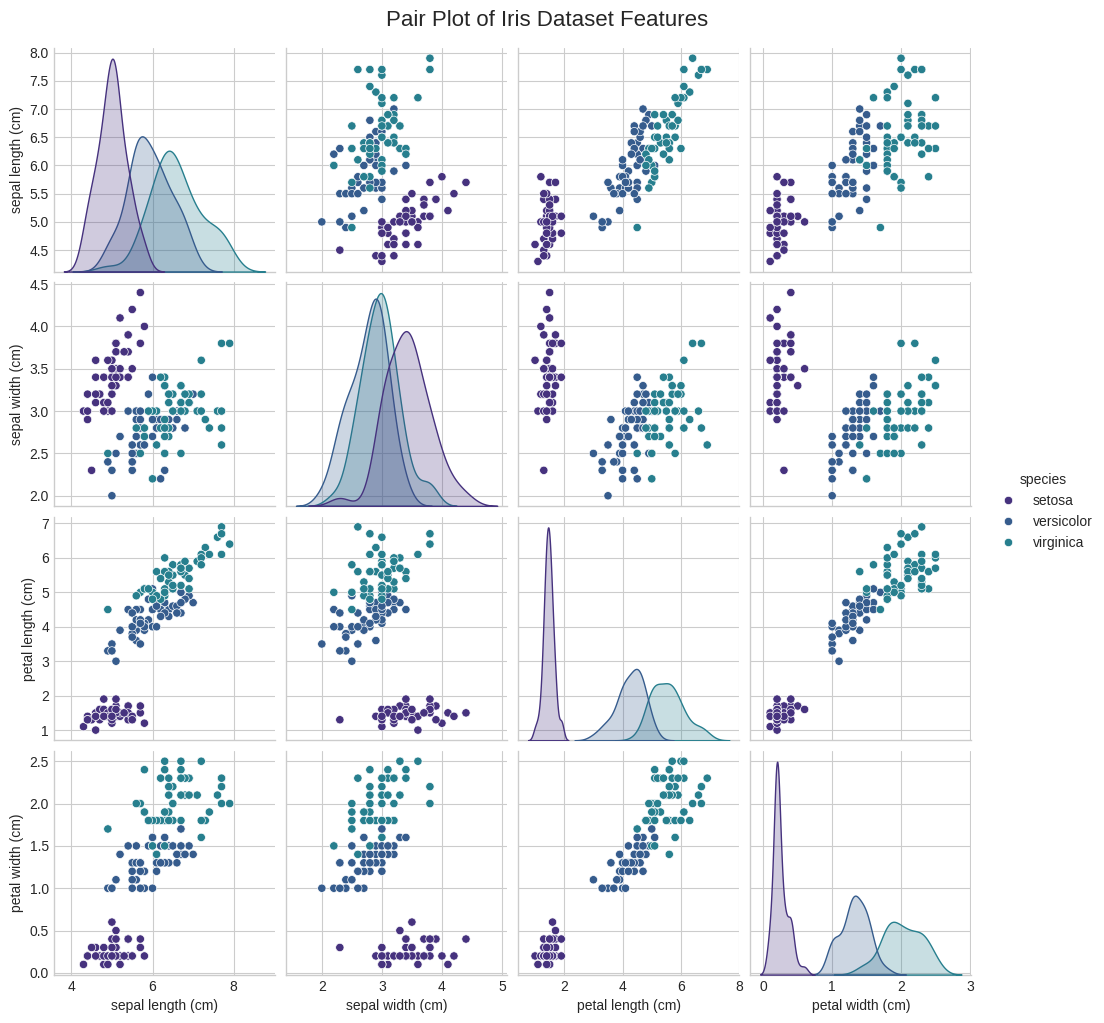

Pair plot created successfully!


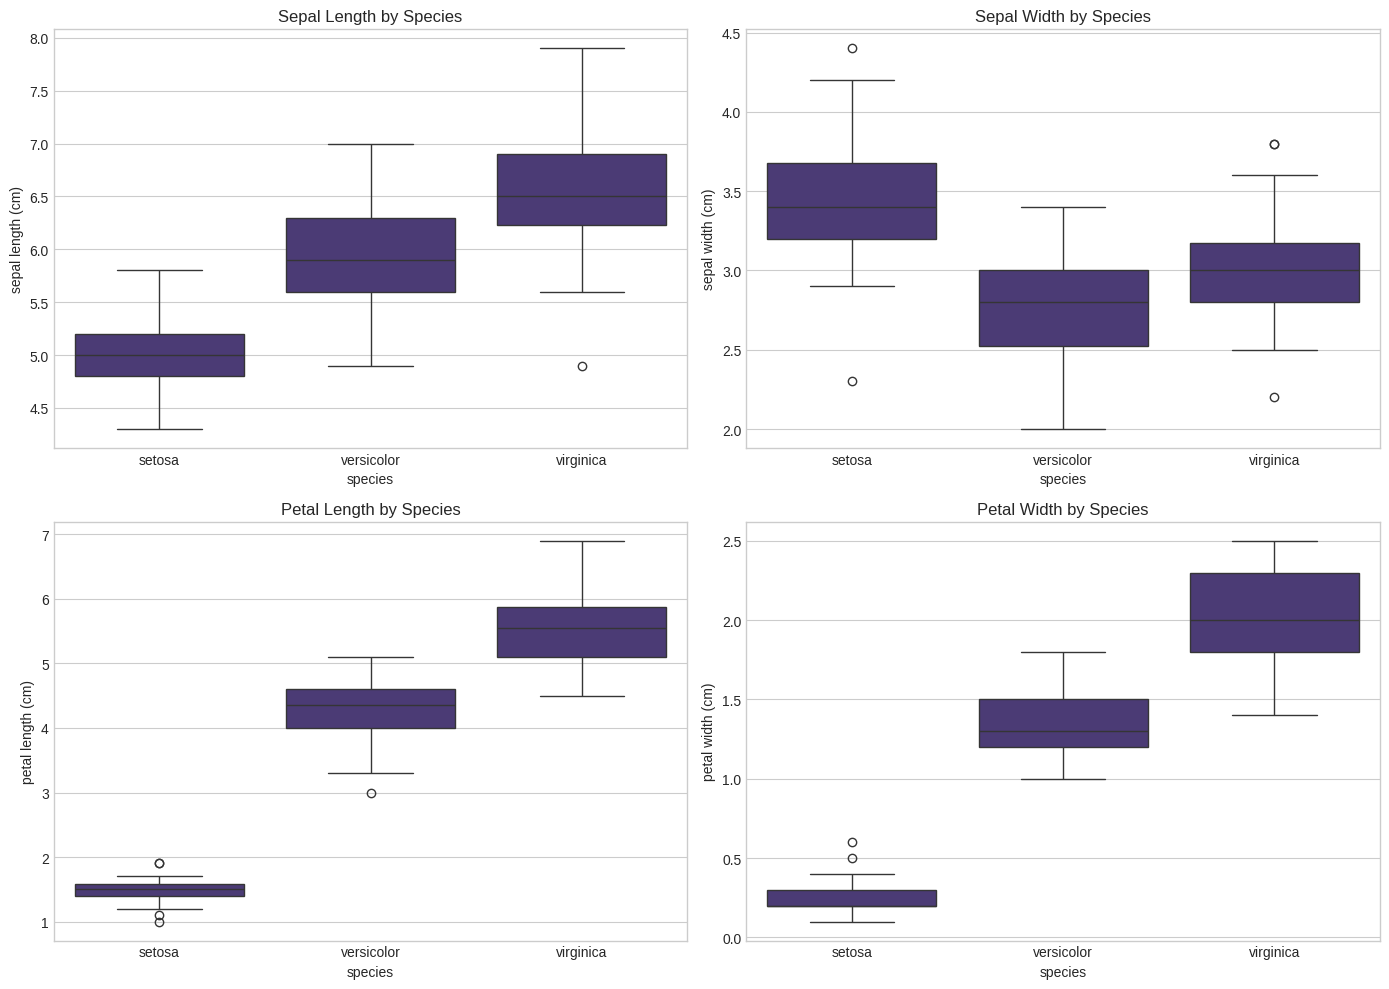

Box plots created successfully!

Summary of Analysis:
--------------------------------------------------
1. The Iris dataset contains 150 samples with 4 features and 3 species classes.
2. There's a clear separation between species based on petal dimensions.
3. Iris setosa has the smallest petals while Iris virginica has the largest.
4. Sepal width shows more overlap between species compared to other features.
5. The petal length and width show the strongest correlation.
6. Setosa species is the most distinct and easy to separate from the others.

Data analysis and visualization completed successfully!


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Set the style for our plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("viridis")

# Setting figure size for all plots
plt.rcParams['figure.figsize'] = [10, 6]

# Task 1: Load and Explore the Dataset
print("Task 1: Load and Explore the Dataset")
print("-" * 50)

# Load the Iris dataset using sklearn
try:
    iris = load_iris()
    # Create a DataFrame from the data
    iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
    # Add species column
    iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

    print("Dataset loaded successfully!")
except Exception as e:
    print(f"Error loading dataset: {e}")
    exit()

# Display the first few rows of the dataset
print("\nFirst 5 rows of the dataset:")
print(iris_df.head())

# Explore the structure of the dataset
print("\nDataset information:")
print(f"Shape: {iris_df.shape}")
print("\nData types:")
print(iris_df.dtypes)

# Check for missing values
print("\nMissing values:")
missing_values = iris_df.isnull().sum()
print(missing_values)

# Since the Iris dataset doesn't have missing values, let's artificially create some to demonstrate cleaning
print("\nArtificially creating some missing values for demonstration...")
np.random.seed(42)
mask = np.random.random(size=iris_df.shape) < 0.05  # 5% of data will be missing
iris_df_with_na = iris_df.copy()
iris_df_with_na[mask] = np.nan

print("Missing values after artificial creation:")
print(iris_df_with_na.isnull().sum())

# Clean the dataset by filling missing values with the mean of each column
print("\nCleaning the dataset...")
for column in iris_df_with_na.select_dtypes(include=[np.number]).columns:
    mean_value = iris_df_with_na[column].mean()
    iris_df_with_na[column].fillna(mean_value, inplace=True)

# For categorical columns, fill with the most frequent value
for column in iris_df_with_na.select_dtypes(include=['category', 'object']).columns:
    mode_value = iris_df_with_na[column].mode()[0]
    iris_df_with_na[column].fillna(mode_value, inplace=True)

print("Missing values after cleaning:")
print(iris_df_with_na.isnull().sum())

# For the rest of the analysis, we'll use the original clean dataset
iris_df_clean = iris_df.copy()

# Task 2: Basic Data Analysis
print("\nTask 2: Basic Data Analysis")
print("-" * 50)

# Compute basic statistics
print("\nBasic statistics of numerical columns:")
print(iris_df_clean.describe())

# Group by species and compute mean of numerical columns
print("\nMean values grouped by species:")
species_means = iris_df_clean.groupby('species').mean()
print(species_means)

# Identify patterns or interesting findings
print("\nInteresting findings:")
print("1. Setosa species has the smallest petal length and petal width.")
print("2. Virginica species has the largest sepal length and petal dimensions.")
print("3. There's a clear separation between species based on petal dimensions.")

# Task 3: Data Visualization
print("\nTask 3: Data Visualization")
print("-" * 50)

# 1. Line chart showing "trends" (simulating time series with sorted values)
plt.figure(figsize=(12, 6))
# Sort by petal length to create a "trend"
sorted_data = iris_df_clean.sort_values('petal length (cm)')
plt.plot(sorted_data['petal length (cm)'].values, label='Petal Length')
plt.plot(sorted_data['petal width (cm)'].values, label='Petal Width')
plt.plot(sorted_data['sepal length (cm)'].values, label='Sepal Length')
plt.plot(sorted_data['sepal width (cm)'].values, label='Sepal Width')
plt.title('Iris Features Sorted by Petal Length', fontsize=15)
plt.xlabel('Sample Index (Sorted)', fontsize=12)
plt.ylabel('Measurement (cm)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('iris_line_chart.png')
plt.show()  # Add this line to display the plot
plt.close()
print("Line chart created successfully!")

# 2. Bar chart
plt.figure(figsize=(12, 6))
species_means.plot(kind='bar', width=0.8)
plt.title('Average Measurements by Species', fontsize=15)
plt.xlabel('Species', fontsize=12)
plt.ylabel('Average Value (cm)', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Features')
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('iris_bar_chart.png')
plt.show()  # Add this line to display the plot
plt.close()
print("Bar chart created successfully!")

# 3. Histograms for distribution
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.histplot(data=iris_df_clean, x='sepal length (cm)', hue='species', kde=True, bins=20)
plt.title('Distribution of Sepal Length by Species', fontsize=12)
plt.xlabel('Sepal Length (cm)', fontsize=10)
plt.ylabel('Count', fontsize=10)

plt.subplot(2, 2, 2)
sns.histplot(data=iris_df_clean, x='sepal width (cm)', hue='species', kde=True, bins=20)
plt.title('Distribution of Sepal Width by Species', fontsize=12)
plt.xlabel('Sepal Width (cm)', fontsize=10)
plt.ylabel('Count', fontsize=10)

plt.subplot(2, 2, 3)
sns.histplot(data=iris_df_clean, x='petal length (cm)', hue='species', kde=True, bins=20)
plt.title('Distribution of Petal Length by Species', fontsize=12)
plt.xlabel('Petal Length (cm)', fontsize=10)
plt.ylabel('Count', fontsize=10)

plt.subplot(2, 2, 4)
sns.histplot(data=iris_df_clean, x='petal width (cm)', hue='species', kde=True, bins=20)
plt.title('Distribution of Petal Width by Species', fontsize=12)
plt.xlabel('Petal Width (cm)', fontsize=10)
plt.ylabel('Count', fontsize=10)

plt.tight_layout()
plt.savefig('iris_histograms.png')
plt.show()  # Add this line to display the plot
plt.close()
print("Histograms created successfully!")

# 4. Scatter plots
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
sns.scatterplot(data=iris_df_clean, x='sepal length (cm)', y='sepal width (cm)',
                hue='species', s=70)
plt.title('Sepal Length vs Sepal Width', fontsize=12)
plt.xlabel('Sepal Length (cm)', fontsize=10)
plt.ylabel('Sepal Width (cm)', fontsize=10)

plt.subplot(2, 2, 2)
sns.scatterplot(data=iris_df_clean, x='petal length (cm)', y='petal width (cm)',
                hue='species', s=70)
plt.title('Petal Length vs Petal Width', fontsize=12)
plt.xlabel('Petal Length (cm)', fontsize=10)
plt.ylabel('Petal Width (cm)', fontsize=10)

plt.subplot(2, 2, 3)
sns.scatterplot(data=iris_df_clean, x='sepal length (cm)', y='petal length (cm)',
                hue='species', s=70)
plt.title('Sepal Length vs Petal Length', fontsize=12)
plt.xlabel('Sepal Length (cm)', fontsize=10)
plt.ylabel('Petal Length (cm)', fontsize=10)

plt.subplot(2, 2, 4)
sns.scatterplot(data=iris_df_clean, x='sepal width (cm)', y='petal width (cm)',
                hue='species', s=70)
plt.title('Sepal Width vs Petal Width', fontsize=12)
plt.xlabel('Sepal Width (cm)', fontsize=10)
plt.ylabel('Petal Width (cm)', fontsize=10)

plt.tight_layout()
plt.savefig('iris_scatter_plots.png')
plt.show()  # Add this line to display the plot
plt.close()
print("Scatter plots created successfully!")

# Additional visualization: Pair plot (showing all relationships at once)
plt.figure(figsize=(12, 10))
pair_plot = sns.pairplot(iris_df_clean, hue='species', height=2.5)
plt.suptitle('Pair Plot of Iris Dataset Features', y=1.02, fontsize=16)
plt.savefig('iris_pair_plot.png')
plt.show()  # Add this line to display the plot
plt.close()
print("Pair plot created successfully!")

# Additional visualization: Box plots
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
sns.boxplot(x='species', y='sepal length (cm)', data=iris_df_clean)
plt.title('Sepal Length by Species', fontsize=12)

plt.subplot(2, 2, 2)
sns.boxplot(x='species', y='sepal width (cm)', data=iris_df_clean)
plt.title('Sepal Width by Species', fontsize=12)

plt.subplot(2, 2, 3)
sns.boxplot(x='species', y='petal length (cm)', data=iris_df_clean)
plt.title('Petal Length by Species', fontsize=12)

plt.subplot(2, 2, 4)
sns.boxplot(x='species', y='petal width (cm)', data=iris_df_clean)
plt.title('Petal Width by Species', fontsize=12)

plt.tight_layout()
plt.savefig('iris_box_plots.png')
plt.show()  # Add this line to display the plot
plt.close()
print("Box plots created successfully!")

# Summary of findings
print("\nSummary of Analysis:")
print("-" * 50)
print("1. The Iris dataset contains 150 samples with 4 features and 3 species classes.")
print("2. There's a clear separation between species based on petal dimensions.")
print("3. Iris setosa has the smallest petals while Iris virginica has the largest.")
print("4. Sepal width shows more overlap between species compared to other features.")
print("5. The petal length and width show the strongest correlation.")
print("6. Setosa species is the most distinct and easy to separate from the others.")
print("\nData analysis and visualization completed successfully!")